## 1. Data Exploration & Setup
Load raw data, EDA (churn rate, distributions, missings), suggest features for config.py.

In [1]:
import os
import sys

project_root = r'c:\Users\anuda\Desktop\cell2cell_churn_drift'
os.chdir(project_root)
sys.path.insert(0, project_root)
from src.config import RAW_DATA 

print("Project Root:", os.getcwd()) 
print("Looking for:", RAW_DATA)
print("File Exists?", os.path.exists(RAW_DATA))

# Quick peek if it exists
if os.path.exists(RAW_DATA):
    import pandas as pd
    df = pd.read_csv(RAW_DATA)
    print("Success! Shape:", df.shape)
    print("Columns:", df.columns.tolist()[:10]) 
else:
    print("File not found — double-check download/path!")

    

Project Root: c:\Users\anuda\Desktop\cell2cell_churn_drift
Looking for: data/raw/cell2cellholdout.csv
File Exists? True
Success! Shape: (51047, 58)
Columns: ['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues']


In [2]:
from src.config import TARGET
# Load & Basic Stats (FIXED: Map Churn first for rate)
df_raw = pd.read_csv(RAW_DATA)
print(f"Raw shape: {df_raw.shape}")
print(f"Columns: {df_raw.columns.tolist()}")

# Map Churn to 0/1 for stats (do this early)
df_raw[TARGET] = df_raw[TARGET].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
print(f"Churn sample (mapped): {df_raw[TARGET].head().tolist()}")  # [1, 1, 0, 0, 1]

# Churn rate as scalar mean (for % format)
churn_rate = df_raw[TARGET].mean()
print(f"Churn rate: {churn_rate:.2%}")  # e.g., 16.32%

# Or print full distribution
print(f"Full Churn distribution:\n{df_raw[TARGET].value_counts(normalize=True)}")

# Missings (after map — Churn now 0 missings)
print(f"Missings per column:\n{df_raw.isnull().sum().sort_values(ascending=False).head(10)}")

Raw shape: (51047, 58)
Columns: ['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice

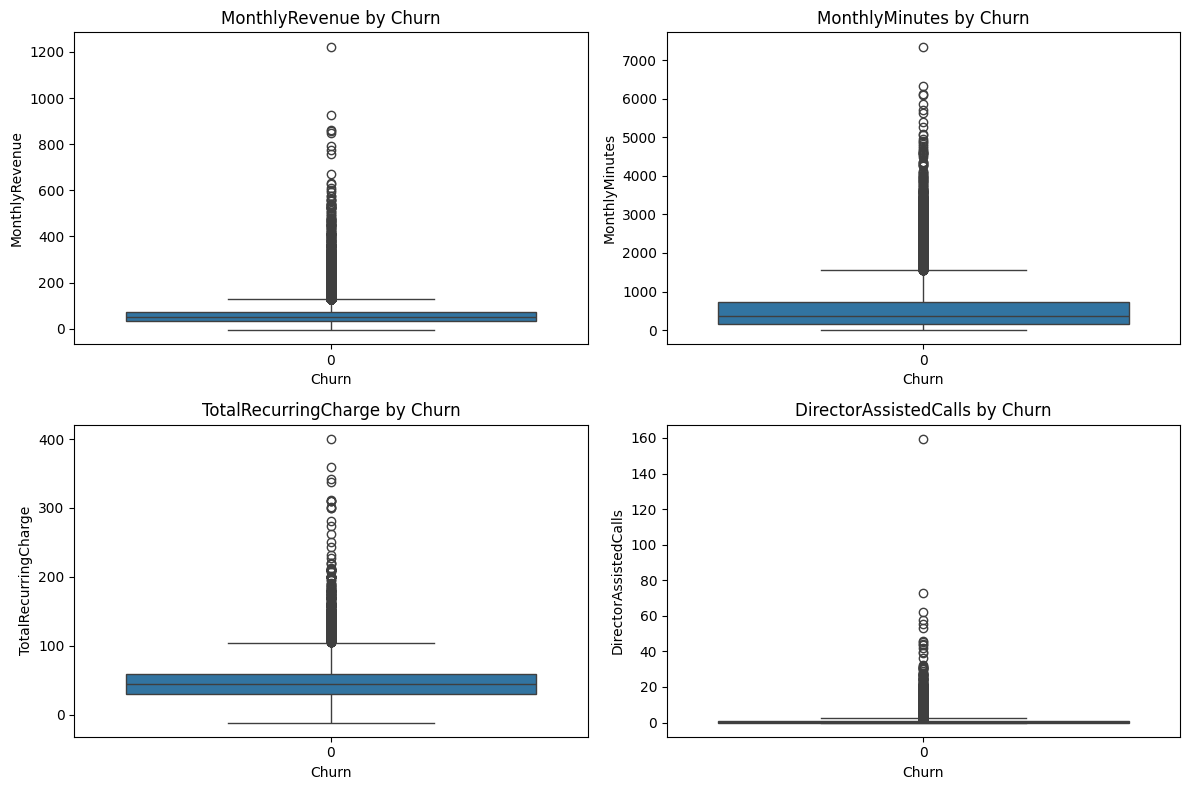

Suggested Categoricals (add to config.py): ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner']


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import NUMERIC_FEATURES

# Boxplots (top 4 for demo)
top_feats = NUMERIC_FEATURES[:4]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feat in enumerate(top_feats):
    row, col = i // 2, i % 2
    sns.boxplot(data=df_raw, x=TARGET, y=feat, ax=axes[row, col])
    axes[row, col].set_title(f'{feat} by Churn')
plt.tight_layout()
plt.show()

# Suggest categoricals
cat_suggestions = [col for col in df_raw.columns if df_raw[col].nunique() < 10 and col not in NUMERIC_FEATURES + [TARGET]]
print(f"Suggested Categoricals (add to config.py): {cat_suggestions[:5]}")